In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split, RandomizedSearchCV)
from sklearn.preprocessing import (
    OneHotEncoder, OrdinalEncoder, 
    StandardScaler, MinMaxScaler)
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import shap 

In [2]:
try:
    market_file_df = pd.read_csv("/datasets/market_file.csv")
    market_money_df = pd.read_csv("/datasets/market_money.csv")
    market_time_df = pd.read_csv("/datasets/market_time.csv")
    money_df = pd.read_csv("/datasets/money.csv", sep=";", decimal=',')
except FileNotFoundError:
    market_file_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Проект 2 - Обучение с учителем_качество модели\market_file.csv")
    market_money_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Проект 2 - Обучение с учителем_качество модели\market_money.csv")
    market_time_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Проект 2 - Обучение с учителем_качество модели\market_time.csv")
    money_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Проект 2 - Обучение с учителем_качество модели\money.csv", sep=";", decimal=',')  


## 1. Загрузка данных

#### 1.1 Загрузка данных и разделение столбцов

In [3]:
market_file_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [5]:
market_file_df.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [6]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
market_money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [8]:
market_money_df.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [9]:
market_time_df.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [10]:
market_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [11]:
market_time_df.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [12]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [13]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [14]:
money_df.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


> **Выводы по первому шагу:**
>
> В первом шаге были проделаны следующие действия: 
>  - загрузка данных;
>  - изучение общей информации о данных.
>
> **После загрузки и изучения данных можно сделать несколько выводов:**
> 1. названия столбцов не соответствуют стандартам python;
> 2. во всех датафреймах нет пропущенных значений;
> 3. чтобы не обрабатывать впоследствии строки, приводя их к числам, был указан параметр `decimal=',' для **money_df**.

## 2. Предобработка данных

#### 2.1 Переименование столбцов в датафреймах и привидение всех значений к одному регистру

In [15]:
market_file_df.rename(columns = {
    "Покупательская активность": "покупательская_активность",
    "Тип сервиса": "тип_сервиса", "Разрешить сообщать": "разрешить_сообщать"}, inplace=True)

In [16]:
market_file_df.columns = market_file_df.columns.str.lower()
market_file_df = market_file_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
market_money_df.columns = market_money_df.columns.str.lower()
market_money_df = market_money_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
market_time_df.columns = market_time_df.columns.str.lower()
market_time_df = market_time_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
money_df.columns = money_df.columns.str.lower()
money_df = money_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#### 2.2 Поиск и устранение дубликатов
##### 2.2.1 Поиск явных дубликатов


In [17]:
# Выводим на экран количество строк-дубликатов в каждом из датафреймов
print(
    market_file_df.duplicated().sum(),
    market_money_df.duplicated().sum(),
    market_time_df.duplicated().sum(),
    money_df.duplicated().sum()
)

0 0 0 0


##### 2.2.2 Поиск неявных дубликатов и исправление орфографических ошибок значений

In [18]:
# Выбираем столбцы с категориальными значениями
selected_columns = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

# Создаем сводную таблицу с value_counts
pivot_table = pd.concat([market_file_df[col].value_counts().rename(col) for col in selected_columns], axis=1)

# Заменяем NaN на дефис в сводной таблице
pivot_table = pivot_table.fillna('-')

# Выводим сводную таблицу
pivot_table

,покупательская_активность,тип_сервиса,разрешить_сообщать,популярная_категория
прежний уровень,802.0,-,-,-
снизилась,498.0,-,-,-
стандарт,-,914.0,-,-
премиум,-,376.0,-,-
стандартт,-,10.0,-,-
да,-,-,962.0,-
нет,-,-,338.0,-
товары для детей,-,-,-,330.0
домашний текстиль,-,-,-,251.0
косметика и аксесуары,-,-,-,223.0


In [19]:
market_money_df["период"].value_counts()

препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: период, dtype: int64

In [20]:
market_time_df["период"].value_counts()

предыдцщий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

In [21]:
# Список неправильного имени
duplicates = ['стандартт']
# Правильное имя
name = 'стандарт'
market_file_df['тип_сервиса'] = market_file_df['тип_сервиса'].replace(duplicates, name)

In [22]:
market_file_df['популярная_категория'] = market_file_df['популярная_категория'].replace({
    'косметика и аксесуары': 'косметика и аксессуары'})

market_money_df['период'] = market_money_df['период'].replace({
    'препредыдущий_месяц': 'предпредыдущий_месяц'})

market_time_df['период'] = market_time_df['период'].replace({
    'предыдцщий_месяц': 'предыдущий_месяц'})

#### 2.3 Поиск аномальных значений

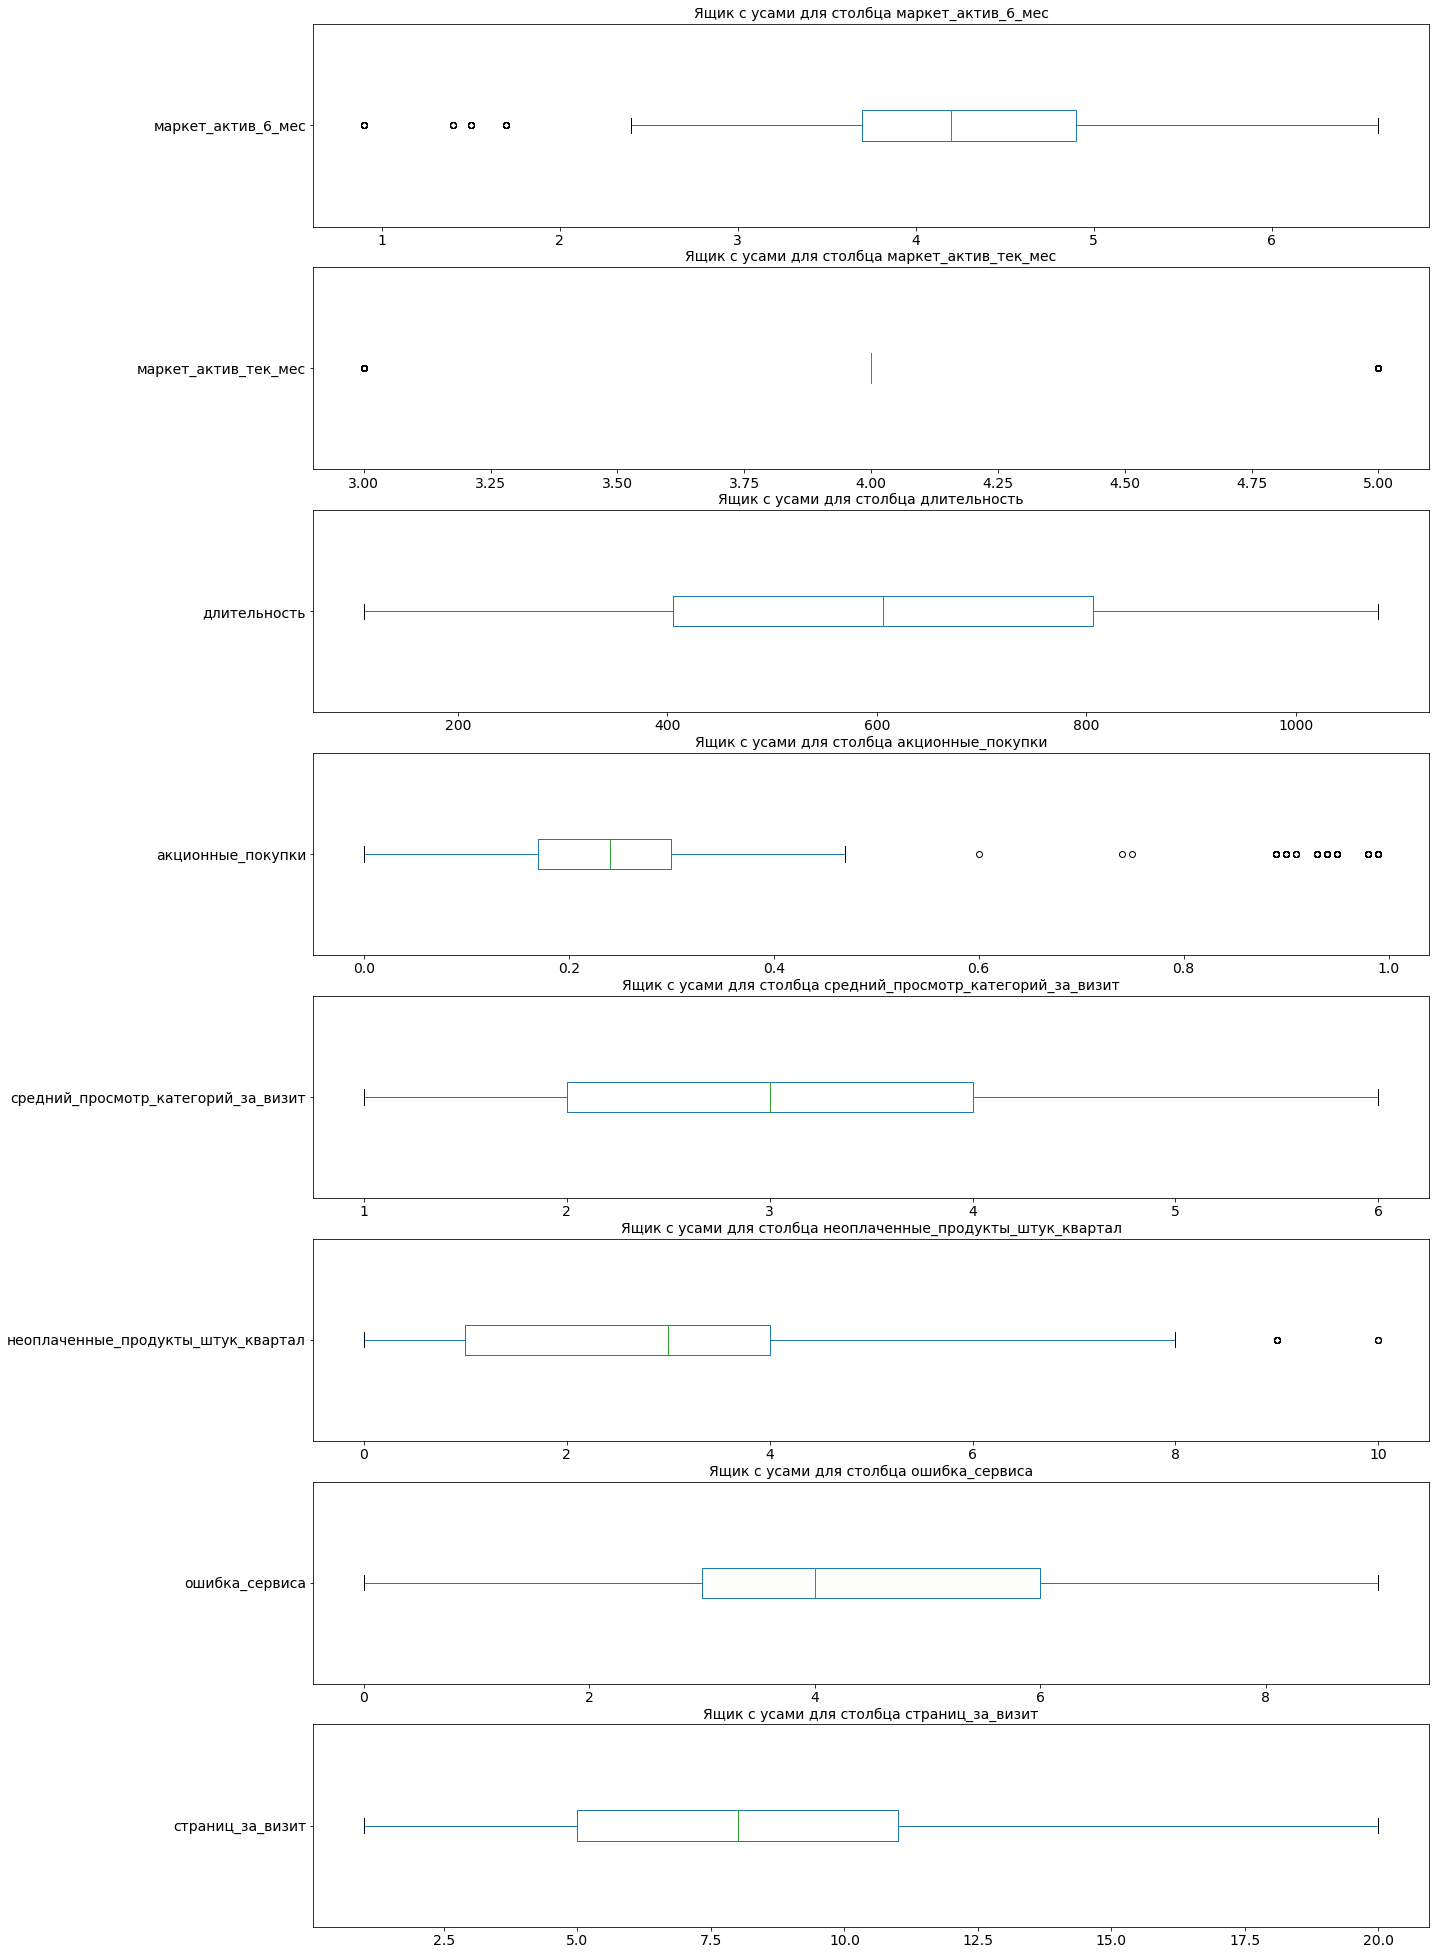

In [23]:
# Создаём переменную в который будет список с количественными значениями market_file_df
cols_to_check = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 
                 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
                 'ошибка_сервиса', 'страниц_за_визит']

fig, axes = plt.subplots(nrows=len(cols_to_check), figsize=(20, 35))

for i, col in enumerate(cols_to_check):
    market_file_df[col].plot(kind='box', vert=False, ax=axes[i], fontsize=14)
    axes[i].set_title(f"Ящик с усами для столбца {col}", fontsize=14)

plt.show()

In [24]:
def plot_boxplot(dataframe, column, ax):
    ax.boxplot(dataframe[column], vert=False)
    ax.set_title(f'Boxplot для столбца "{column}"', fontsize=14)
    ax.set_xlabel(f'Столбец "{column}"', fontsize=14)
    ax.set_ylabel('Значения')

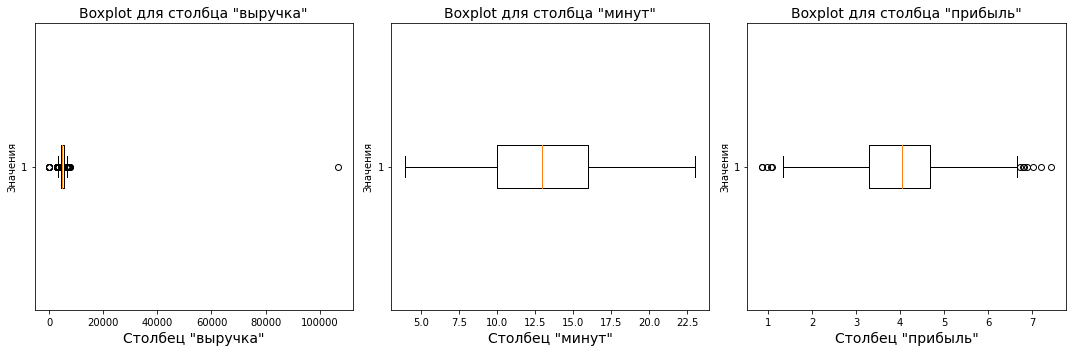

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plot_boxplot(market_money_df, 'выручка', axs[0])
plot_boxplot(market_time_df, 'минут', axs[1])
plot_boxplot(money_df, 'прибыль', axs[2])

plt.tight_layout()
plt.show()

In [26]:
# Находим индекс максимального значения в столбце 
max_index = market_money_df['выручка'].idxmax()

# Удаляем строку с максимальным значением
market_money_df = market_money_df.drop(max_index)

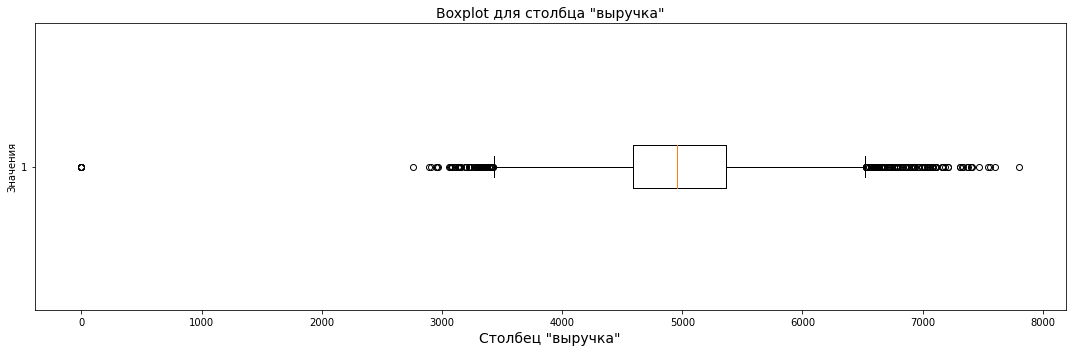

In [27]:
fig, axs = plt.subplots(1, figsize=(15, 5))
plot_boxplot(market_money_df, 'выручка', axs)
plt.tight_layout()
plt.show()

> **Выводы по второму шагу:**
>
> Во втором шаге были проделаны следующие действия: 
>  - переименование столбцов;
>  - поиск и удаление явных и неявных дубликатов;
>  - привидение всех значений к одному регистру;
>  - поиск аномальных значений;
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. столбцы были написаны не по стандартам python. Столбцы были приведены к одному регистру и написаны по стандартам snake_case;
> 2. в датафрейме **market_file_df** были неявные дубликаты, которые были устранены;
> 3. значения были привидены к одному регистру;
> 4. в процессе поиска аномальных значений выяснилось, что в столбце "выручка" датафрейма **market_money_df** была аномалия, которая была удалена. В остальных столбцах с количественными значениями тоже были выбросы, но умеренные;
> 5. после всех проделанных действий данные готовы к исследоветельскому анализу.

## 3. Исследовательский анализ

#### 3.1 Создание функций для построения графиков

In [28]:
# Функция для категориальных данных
def plot_categorical_countplot(data, column, title, xlabel, ylabel, order=None, edgecolor='black'):
    plt.figure(figsize=(18, 6))
    sns.countplot(data=data, x=column, order=order, edgecolor=edgecolor)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True)
    plt.show()

# Функция для количественных данных
def plot_numerical_distribution(data, column, title, xlabel, ylabel, bins=30, kde=True, color='red', edgecolor='black'):
    plt.figure(figsize=(18, 6))
    sns.histplot(data=data, x=column, bins=bins, kde=kde, color=color, edgecolor=edgecolor)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True)
    plt.show()

#### 3.1.1 Построение графиков для **"market_file_df"**

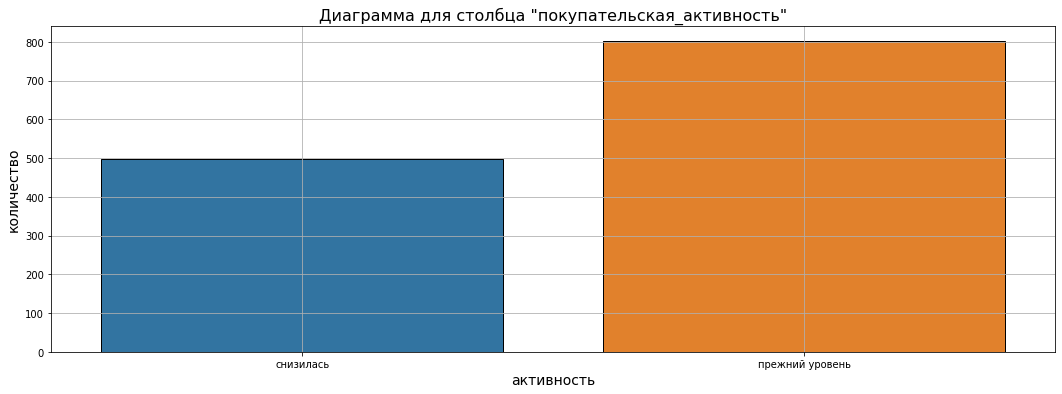

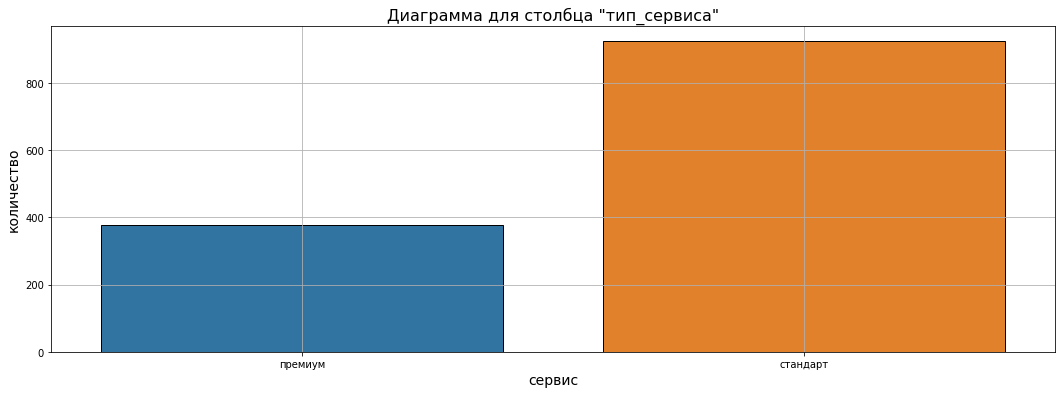

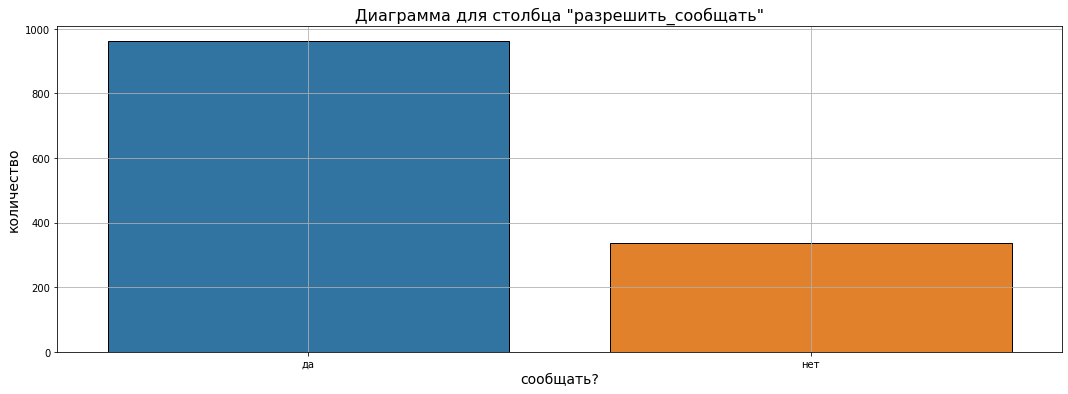

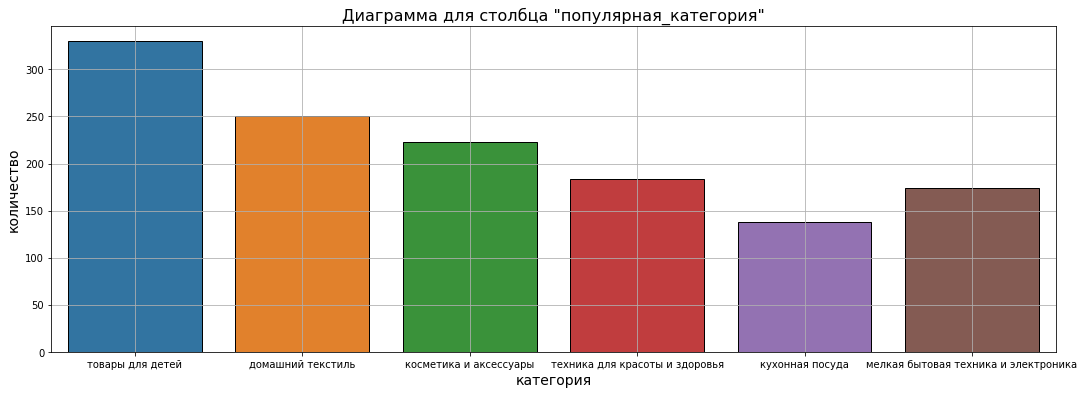

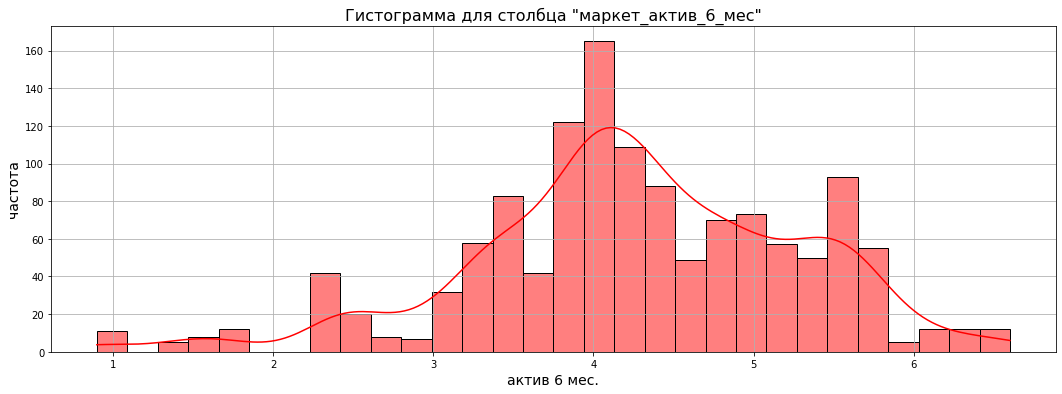

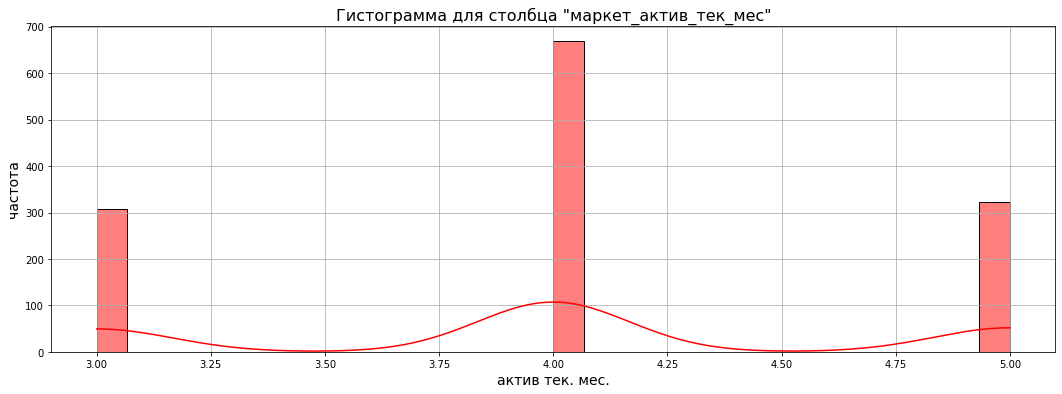

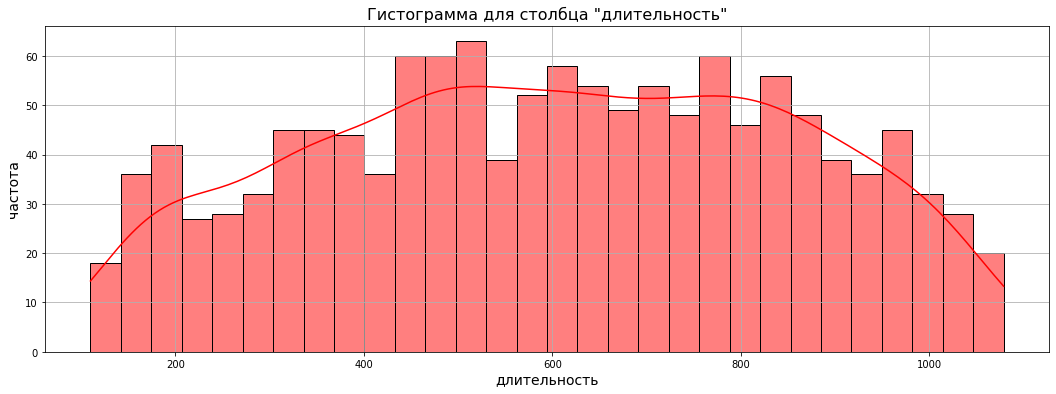

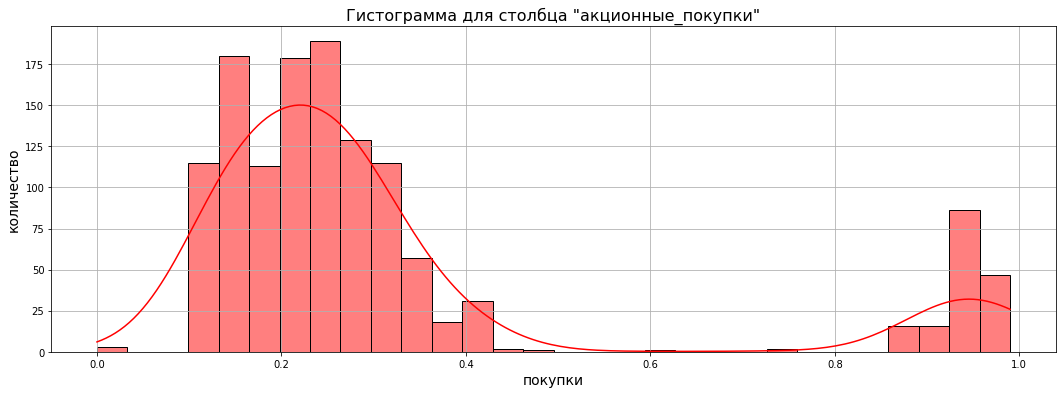

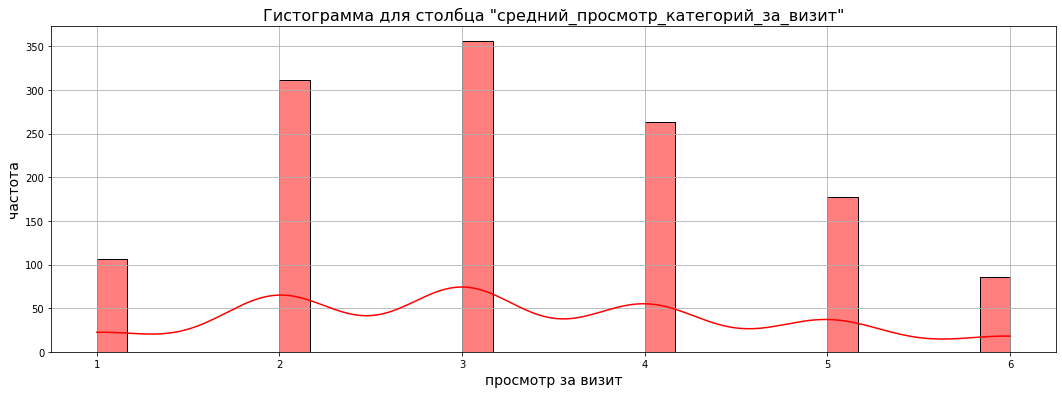

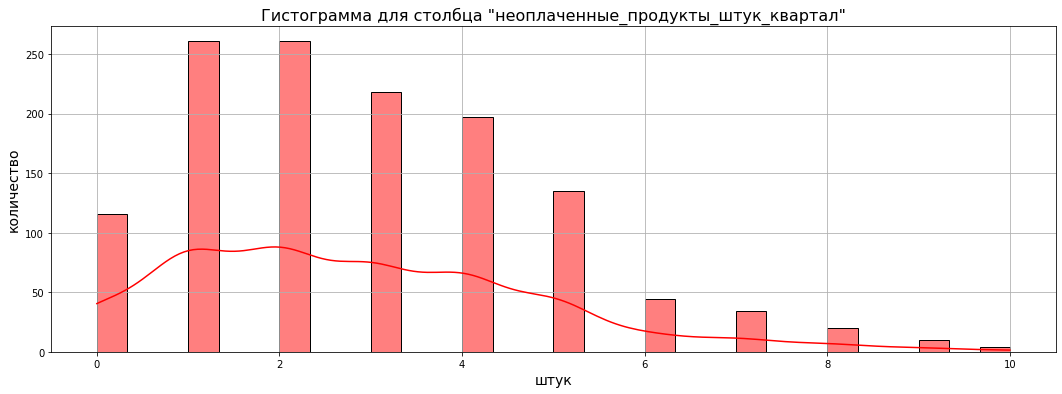

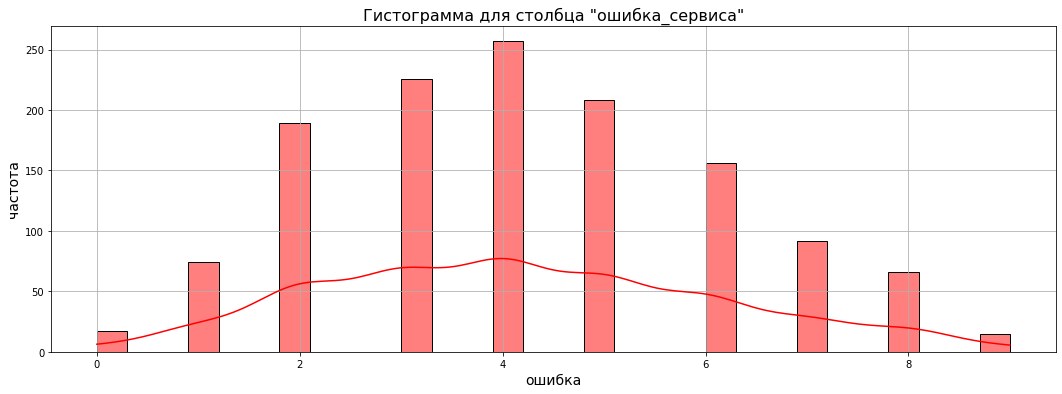

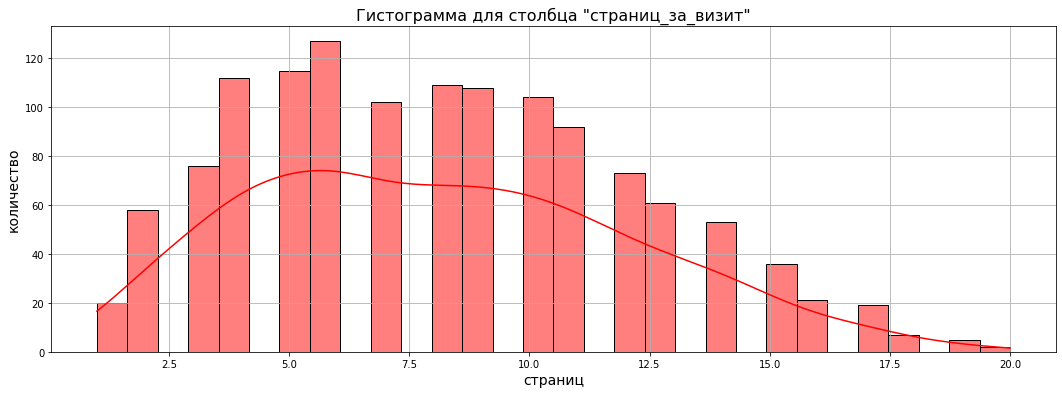

In [29]:
# Построение графиков по категориальным данным
plot_categorical_countplot(market_file_df, 'покупательская_активность', 
                           'Диаграмма для столбца "покупательская_активность"', 'активность', 'количество')
plot_categorical_countplot(market_file_df, 'тип_сервиса', 
                           'Диаграмма для столбца "тип_сервиса"', 'сервис', 'количество')
plot_categorical_countplot(market_file_df, 'разрешить_сообщать', 
                           'Диаграмма для столбца "разрешить_сообщать"', 'сообщать?', 'количество')
plot_categorical_countplot(market_file_df, 'популярная_категория', 
                           'Диаграмма для столбца "популярная_категория"', 'категория', 'количество')

# Построение графиков по количественным данным
plot_numerical_distribution(market_file_df, 'маркет_актив_6_мес', 
                            'Гистограмма для столбца "маркет_актив_6_мес"', 'актив 6 мес.', 'частота')
plot_numerical_distribution(market_file_df, 'маркет_актив_тек_мес', 
                            'Гистограмма для столбца "маркет_актив_тек_мес"', 'актив тек. мес.', 'частота')
plot_numerical_distribution(market_file_df, 'длительность', 
                            'Гистограмма для столбца "длительность"', 'длительность', 'частота')
plot_numerical_distribution(market_file_df, 'акционные_покупки', 
                            'Гистограмма для столбца "акционные_покупки"', 'покупки', 'количество')
plot_numerical_distribution(market_file_df, 'средний_просмотр_категорий_за_визит', 
                            'Гистограмма для столбца "средний_просмотр_категорий_за_визит"', 'просмотр за визит', 'частота')
plot_numerical_distribution(market_file_df, 'неоплаченные_продукты_штук_квартал', 
                            'Гистограмма для столбца "неоплаченные_продукты_штук_квартал"', 'штук', 'количество')
plot_numerical_distribution(market_file_df, 'ошибка_сервиса', 
                            'Гистограмма для столбца "ошибка_сервиса"', 'ошибка', 'частота')
plot_numerical_distribution(market_file_df, 'страниц_за_визит', 
                            'Гистограмма для столбца "страниц_за_визит"', 'страниц', 'количество')

#### 3.1.2 Построение графиков для **"market_money_df"**

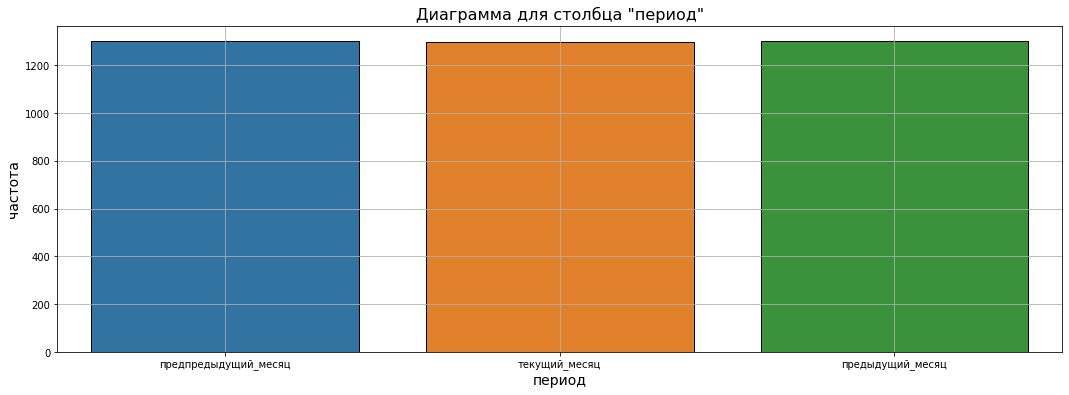

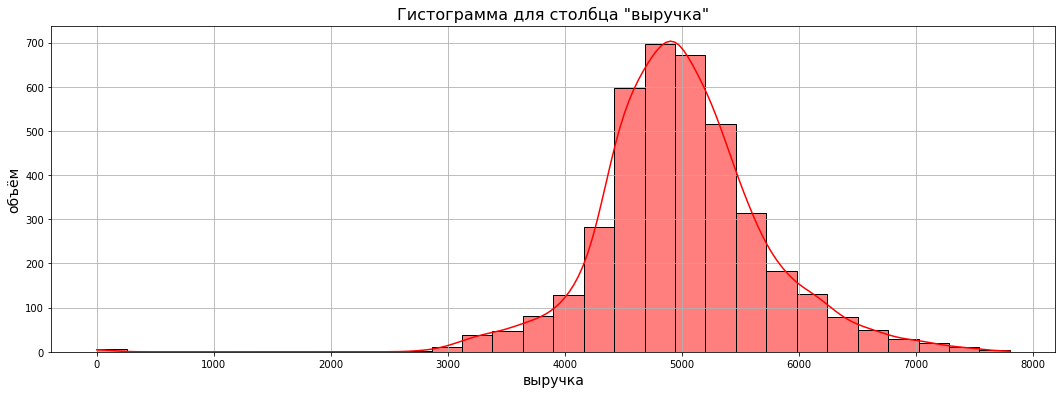

In [30]:
# Построение графиков по категориальным данным
plot_categorical_countplot(market_money_df, 'период', 
                           'Диаграмма для столбца "период"', 'период', 'частота')

# Построение графиков по количественным данным
plot_numerical_distribution(market_money_df, 'выручка', 
                            'Гистограмма для столбца "выручка"', 'выручка', 'объём')

#### 3.1.3 Построение графиков для **"market_time_df"**

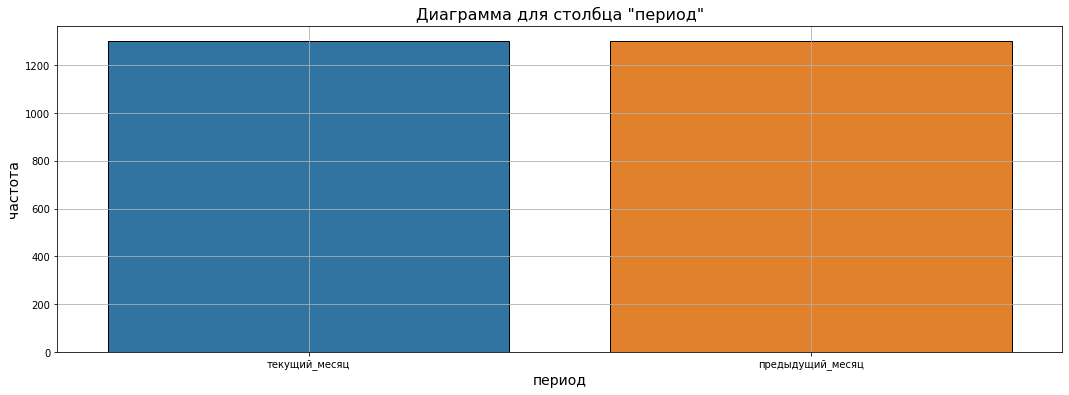

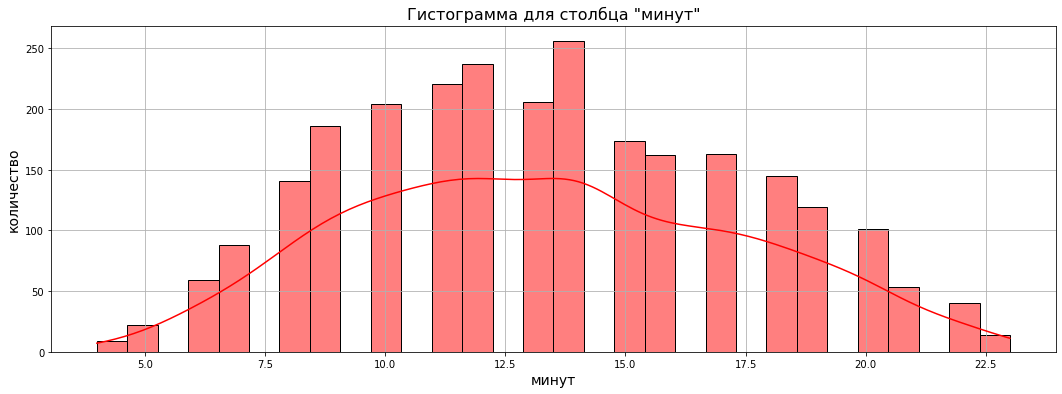

In [31]:
# Построение графиков по категориальным данным
plot_categorical_countplot(market_time_df, 'период', 
                           'Диаграмма для столбца "период"', 'период', 'частота')

# Построение графиков по количественным данным
plot_numerical_distribution(market_time_df, 'минут', 
                            'Гистограмма для столбца "минут"', 'минут', 'количество')

#### 3.1.4 Построение графиков для **"money_df"**

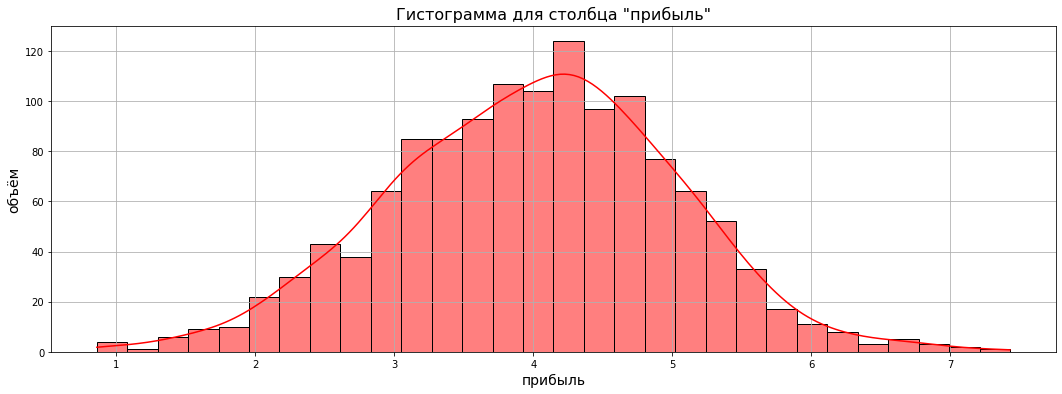

In [32]:
# Построение графиков по количественным данным
plot_numerical_distribution(money_df, 'прибыль', 
                            'Гистограмма для столбца "прибыль"', 'прибыль', 'объём')

In [33]:
market_file_df

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,прежний уровень,стандарт,да,6.6,3,318,0.24,техника для красоты и здоровья,5,3,3,11
1296,216644,прежний уровень,стандарт,нет,5.1,4,454,0.21,домашний текстиль,6,2,3,9
1297,216645,прежний уровень,стандарт,да,4.1,3,586,0.20,домашний текстиль,3,2,5,7
1298,216646,прежний уровень,стандарт,да,6.3,5,645,0.12,техника для красоты и здоровья,3,3,5,7


#### 3.2 Построение графиков распределения признаков в разрезе целевого признака

In [34]:
def plot_activity_distribution(data_frame, column_name):
    plt.figure(figsize=(20, 10))

    plt.hist(data_frame[data_frame['покупательская_активность'] == 'снизилась'][column_name], 
             bins=20, edgecolor='black', alpha=1, label='снижение активности')

    plt.hist(data_frame[data_frame['покупательская_активность'] == 'прежний уровень'][column_name], 
             bins=20, alpha=0.5, label='прежний уроень')

    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Количество пользователей', fontsize=14)
    plt.title(f'Распределение {column_name} для пользователей с и без снижения активности', fontsize=14)
    plt.xticks(rotation=0)
    plt.legend()
    plt.grid(True)
    plt.show()

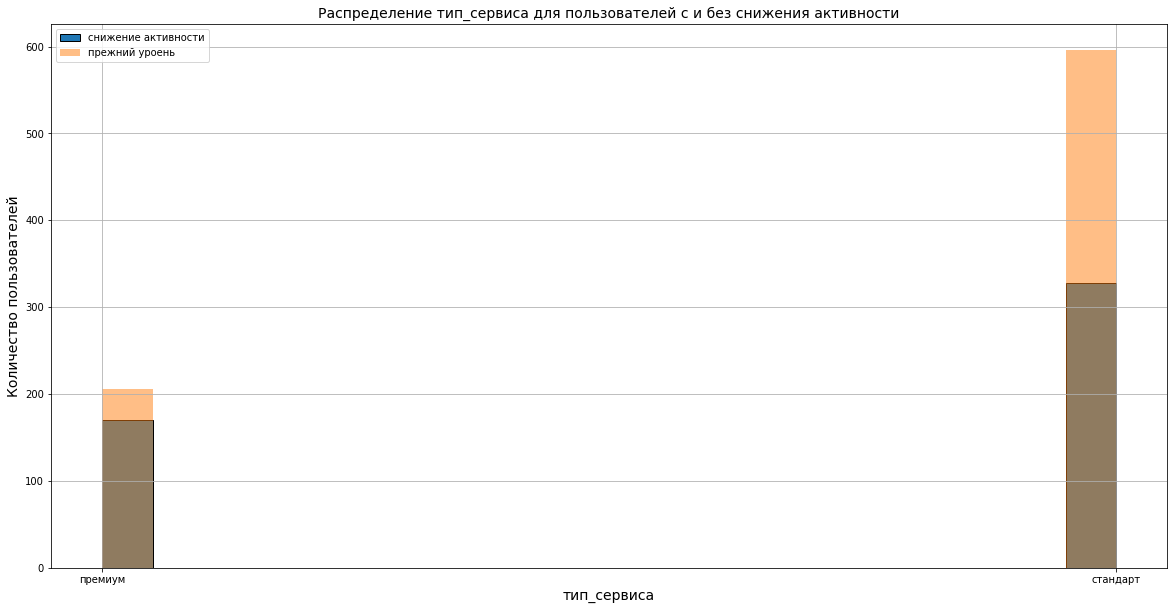

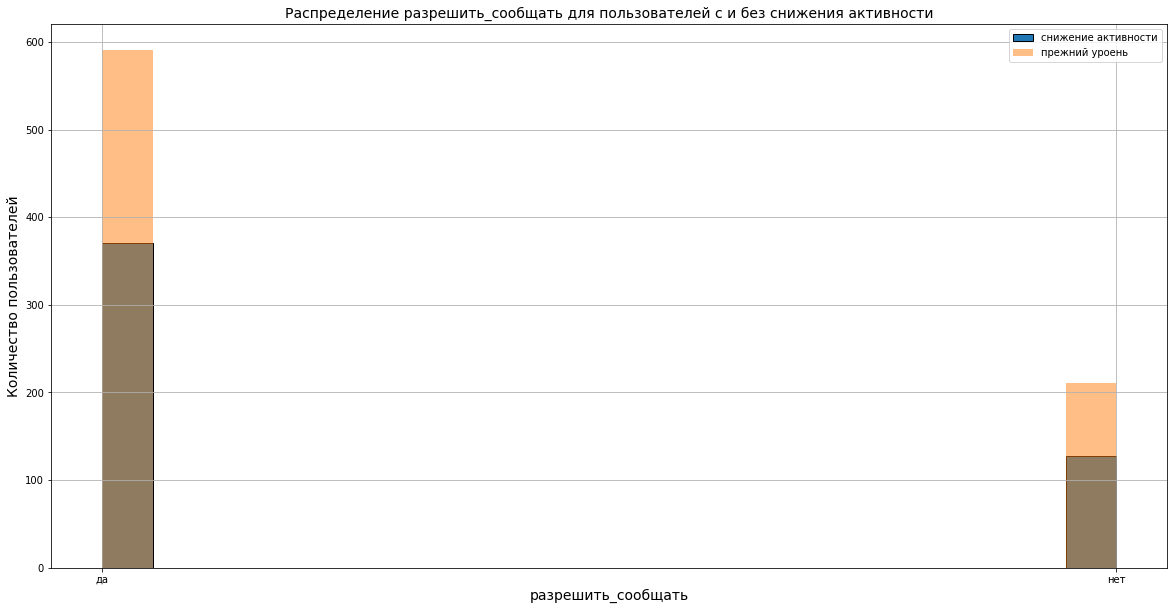

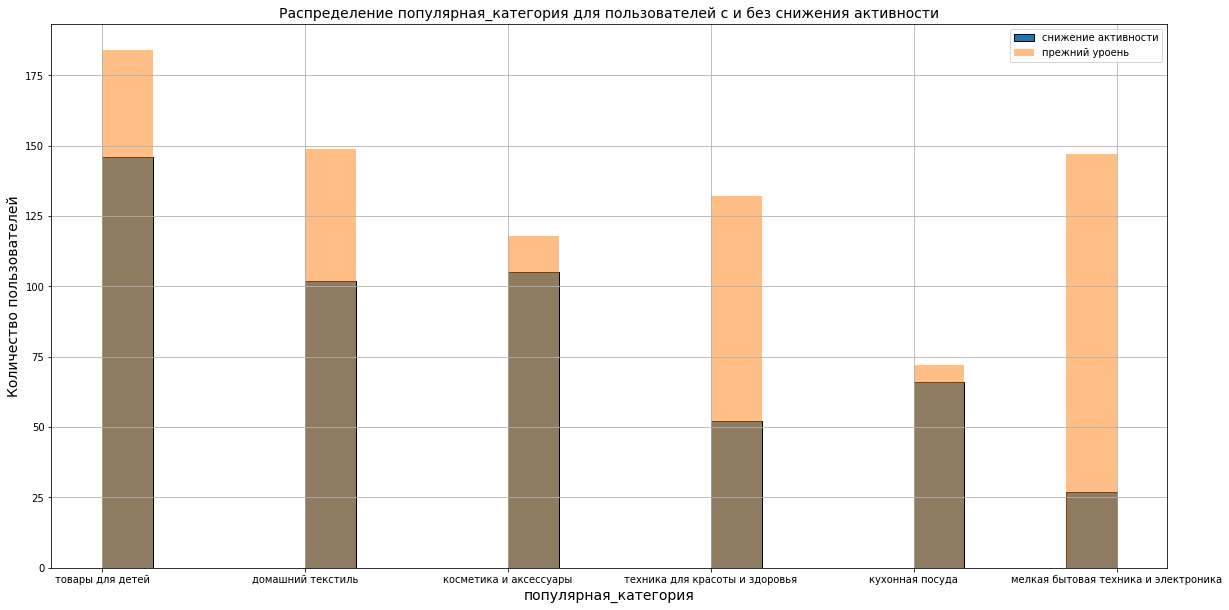

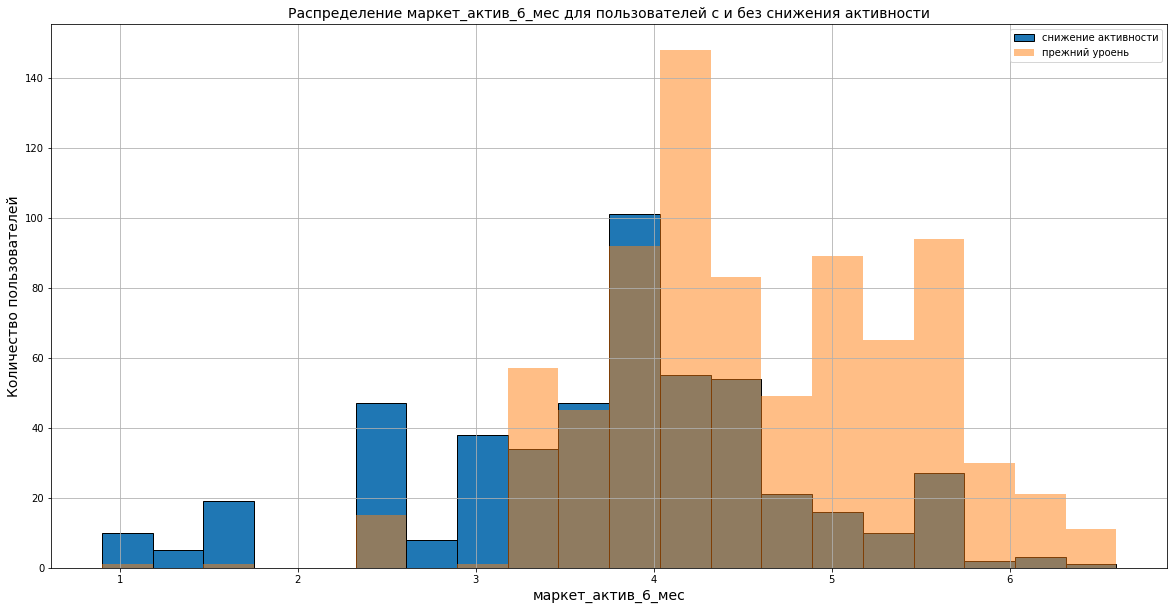

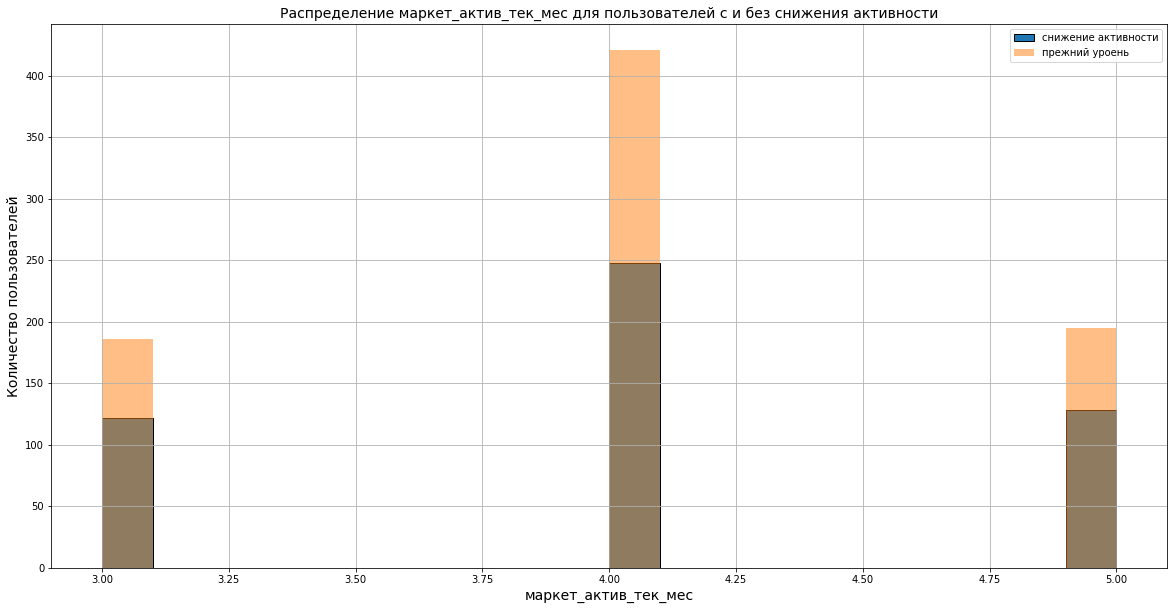

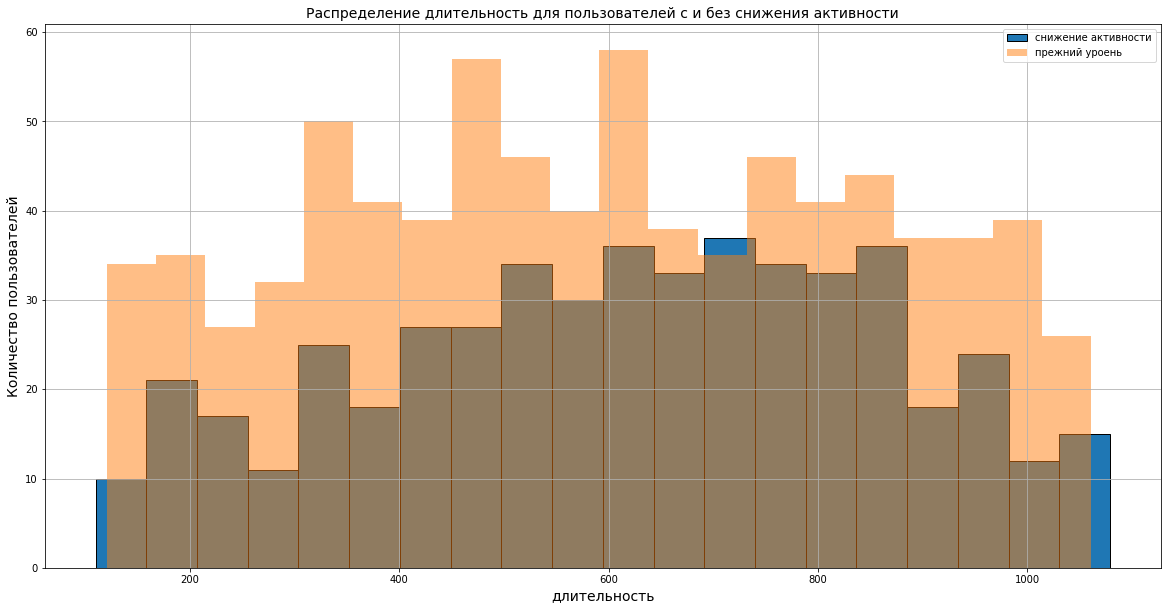

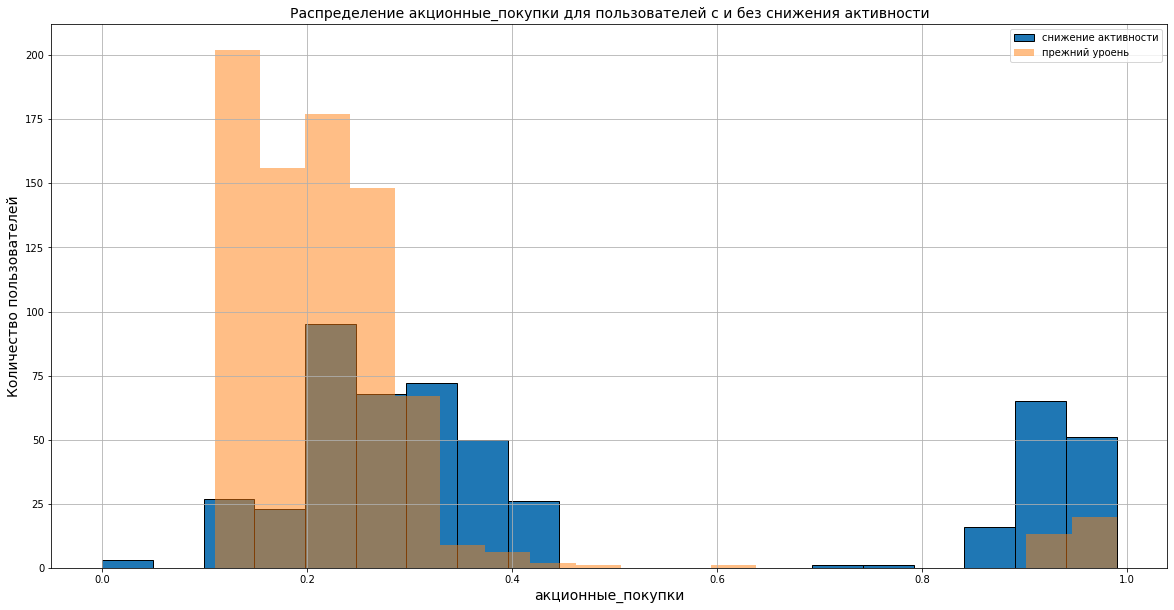

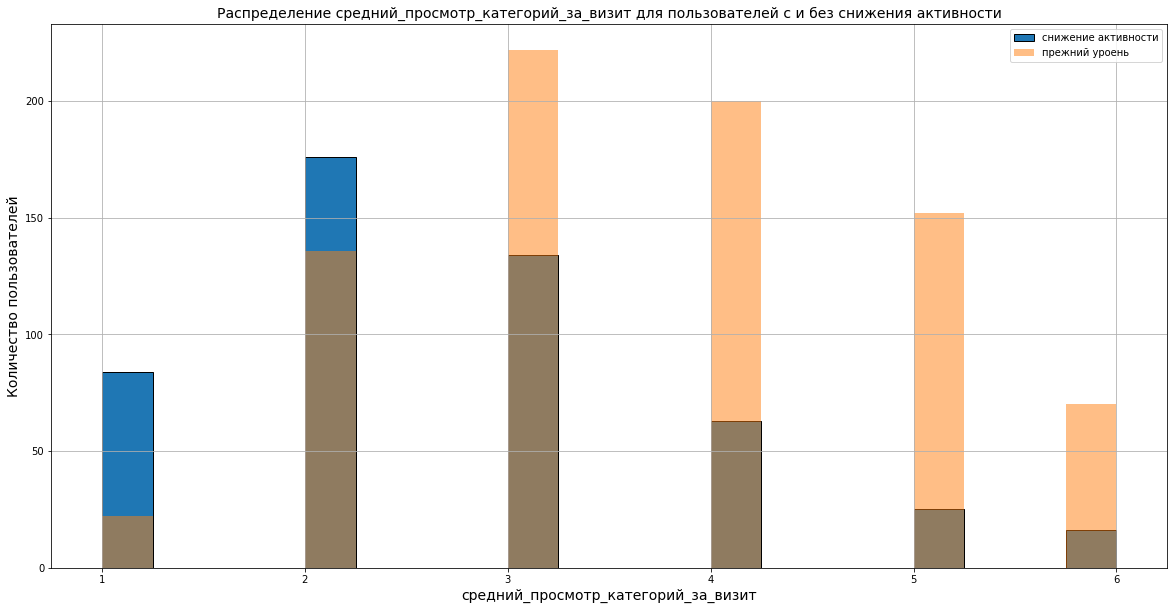

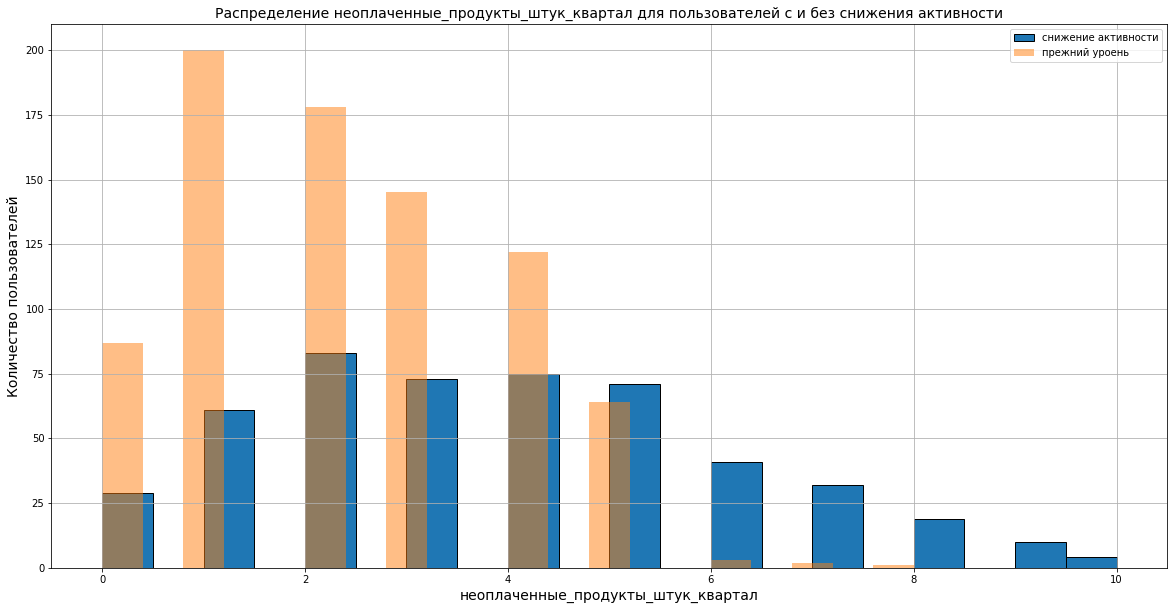

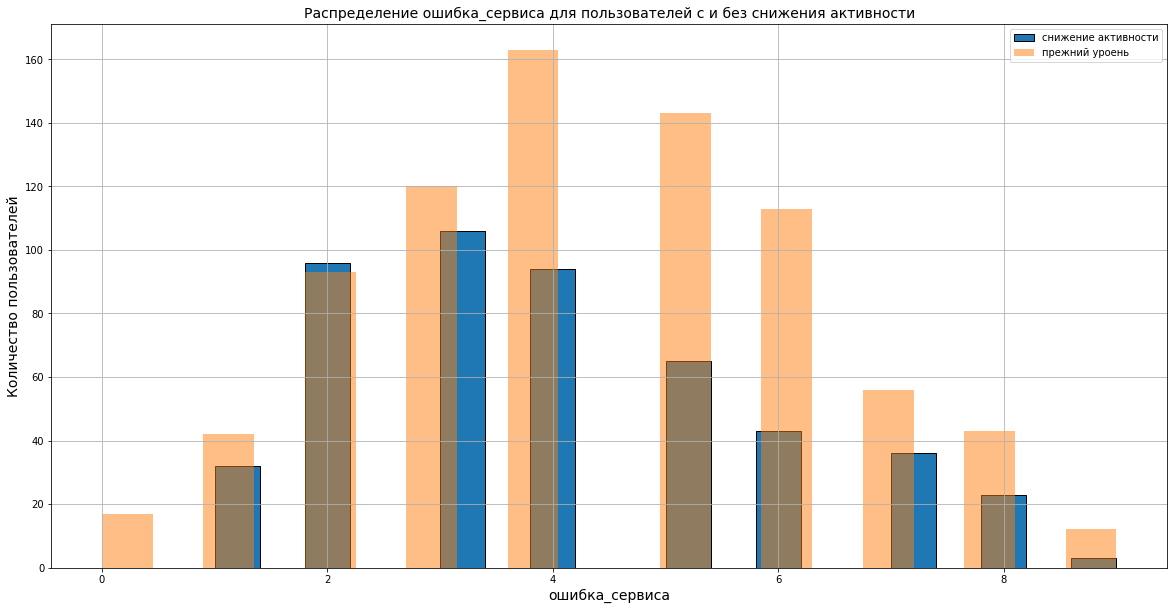

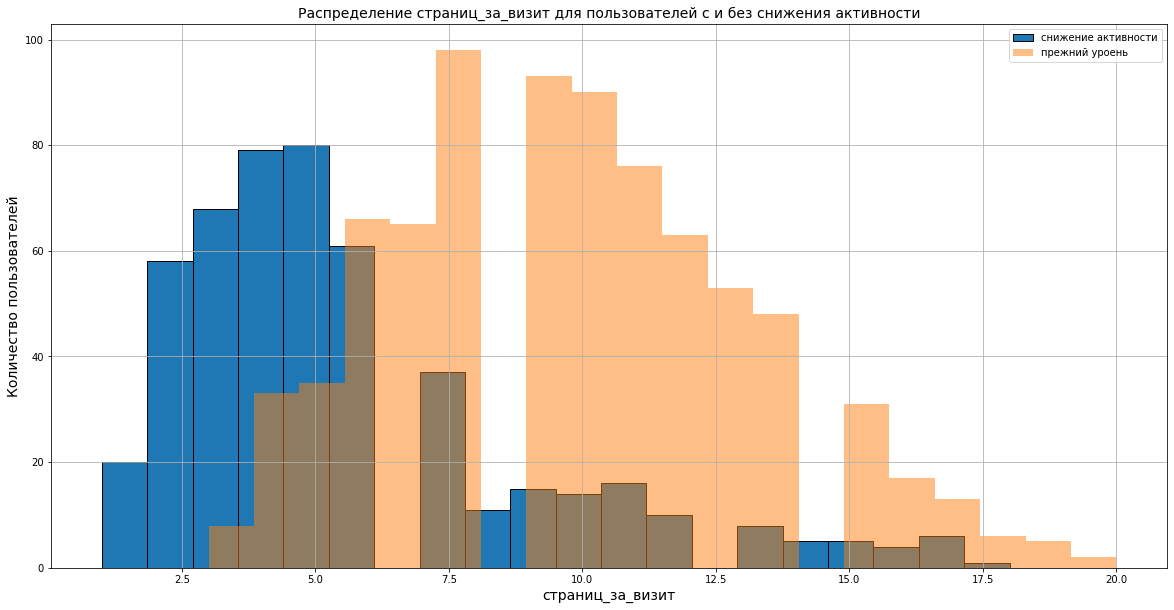

In [35]:
# Графики для категориальных признаков в разрезе целевого
plot_activity_distribution(market_file_df, "тип_сервиса")
plot_activity_distribution(market_file_df, "разрешить_сообщать")
plot_activity_distribution(market_file_df, "популярная_категория")
# Графики для количественных признаков в разрезе целевого
plot_activity_distribution(market_file_df, "маркет_актив_6_мес")
plot_activity_distribution(market_file_df, "маркет_актив_тек_мес")
plot_activity_distribution(market_file_df, "длительность")
plot_activity_distribution(market_file_df, "акционные_покупки")
plot_activity_distribution(market_file_df, "средний_просмотр_категорий_за_визит")
plot_activity_distribution(market_file_df, "неоплаченные_продукты_штук_квартал")
plot_activity_distribution(market_file_df, "ошибка_сервиса")
plot_activity_distribution(market_file_df, "страниц_за_визит")

#### 3.2 Отбор клиентов с покупательской активностью не менее трёх месяцев

In [36]:
# Отберем клиентов с покупательской активностью не менее трех месяцев
active_customers_3_months = market_money_df.groupby('id')['выручка'].count().reset_index()
active_customers_3_months = active_customers_3_months[active_customers_3_months['выручка'] >= 3]

# Оставим только тех клиентов, у которых есть активность в течение 3 и более месяцев
active_customers_3_months = market_money_df[market_money_df['id'].isin(active_customers_3_months['id'])]

# Используем pivot_table для создания новых столбцов
pivot_df = active_customers_3_months.pivot_table(index='id', columns='период', values='выручка', aggfunc='first')

# Объединяем полученные данные с исходным датафреймо
result_data = pd.merge(active_customers_3_months, pivot_df, on='id')

# Удаляем повторяющиеся строки по столбцу 'id'
result_data = result_data.drop_duplicates(subset='id')

# Индексация датафреймов
result_data = result_data[(result_data['предыдущий_месяц'] != 0) & (result_data['предпредыдущий_месяц'] != 0)]

# Удаление лишних колонок
result_data = result_data.drop(['период', 'выручка'], axis=1)

# Вывод результата
result_data

,id,предпредыдущий_месяц,предыдущий_месяц,текущий_месяц
3,215349,4472.0,5216.0,4971.6
6,215350,4826.0,5457.5,5058.4
9,215351,4793.0,6158.0,6610.4
12,215352,4594.0,5807.5,5872.5
15,215353,5124.0,4738.5,5388.5
...,...,...,...,...
3882,216643,4704.0,3664.0,4741.7
3885,216644,5299.0,4729.0,5353.0
3888,216645,5334.0,5160.0,5139.2
3891,216646,4725.0,4923.0,5224.6


> **Выводы по третьему шагу:**
>
> В третьем шаге были проделаны следующие действия: 
>  - созданы функции для построения графиков;
>  - построены графики по всем таблицам;
>  - были отобраны клиенты с покупательской активностью не менее трёх месяцев.
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. в датафрейме **market_file_df** 4 категориальных призанака: "покупательская_активность", "тип_сервиса", "разрешить_сообщать" и "популярная_категория".
> > столбец "покупательская_активность" делится на значения: *прежний уровень*(802) и *снизилась*(498);
> >
> > столбец "тип_сервиса" делится на значения: *стандарт*(924) и *преимум*(376);
> >
> > столбец "разрешить_сообщать" делится на значения: *да*(962) и *нет*(368);
> >
> > столбец "популярная_категория" делится на значения: *товары для детей*(330), *домашний текстиль*(251), *косметика и аксессуары*(223),
> > *техника для красоты и здоровья*(184), *мелкая бытовая техника и электроника*(174), *кухонная посуда*(138).
> 2. в датафрейме **market_money_df** 1 категориальный призанак: "период".
> > столбец "период" делится на значения: *предпредыдущий_месяц*(1300), *предыдущий_месяц*(1300) и *текущий_месяц*(1299
).
> 3. в датафрейме **market_time_df** 1 категориальный призанак: "период".
> > столбец "период" делится на значения: *предыдущий_месяц*(1300) и *текущий_месяц*(1300).


## 4. Объединение таблиц

In [37]:
market_money_df_2 = pd.pivot_table(result_data, index='id')
market_money_df_2.columns = ['выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']
market_money_df_2 = market_money_df_2[~market_money_df_2['выручка_текущий_месяц'].isna()]

market_time_df_2 = pd.pivot_table(market_time_df, index='id', columns='период', values='минут')
market_time_df_2.columns = ['минут_предыдущий_месяц','минут_текущий_месяц']

merged_df = pd.merge(market_file_df, market_money_df_2, on=['id'])
merged_df = pd.merge(merged_df, market_time_df_2, on=['id'])

merged_df

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,прежний уровень,стандарт,да,6.6,3,318,0.24,техника для красоты и здоровья,5,3,3,11,4704.0,3664.0,4741.7,14,7
1292,216644,прежний уровень,стандарт,нет,5.1,4,454,0.21,домашний текстиль,6,2,3,9,5299.0,4729.0,5353.0,12,11
1293,216645,прежний уровень,стандарт,да,4.1,3,586,0.20,домашний текстиль,3,2,5,7,5334.0,5160.0,5139.2,12,18
1294,216646,прежний уровень,стандарт,да,6.3,5,645,0.12,техника для красоты и здоровья,3,3,5,7,4725.0,4923.0,5224.6,18,7


In [38]:
# Проверим количество пропусков в % датафрейма merged_df
pd.DataFrame(round(merged_df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
id,0.000000
покупательская_активность,0.000000
тип_сервиса,0.000000
разрешить_сообщать,0.000000
маркет_актив_6_мес,0.000000
маркет_актив_тек_мес,0.000000
длительность,0.000000
акционные_покупки,0.000000
популярная_категория,0.000000
средний_просмотр_категорий_за_визит,0.000000


> **Выводы по четвёртому шагу:**
>
> В четвёртом шаге были проделаны следующие действия: 
>  - все таблицы объединены в одну под названием **merged_df**;
>  - удалён пользователь, у которого был выброс;
>  - проверено количество пропусков в **merged_df**.


## 5. Корреляционный анализ

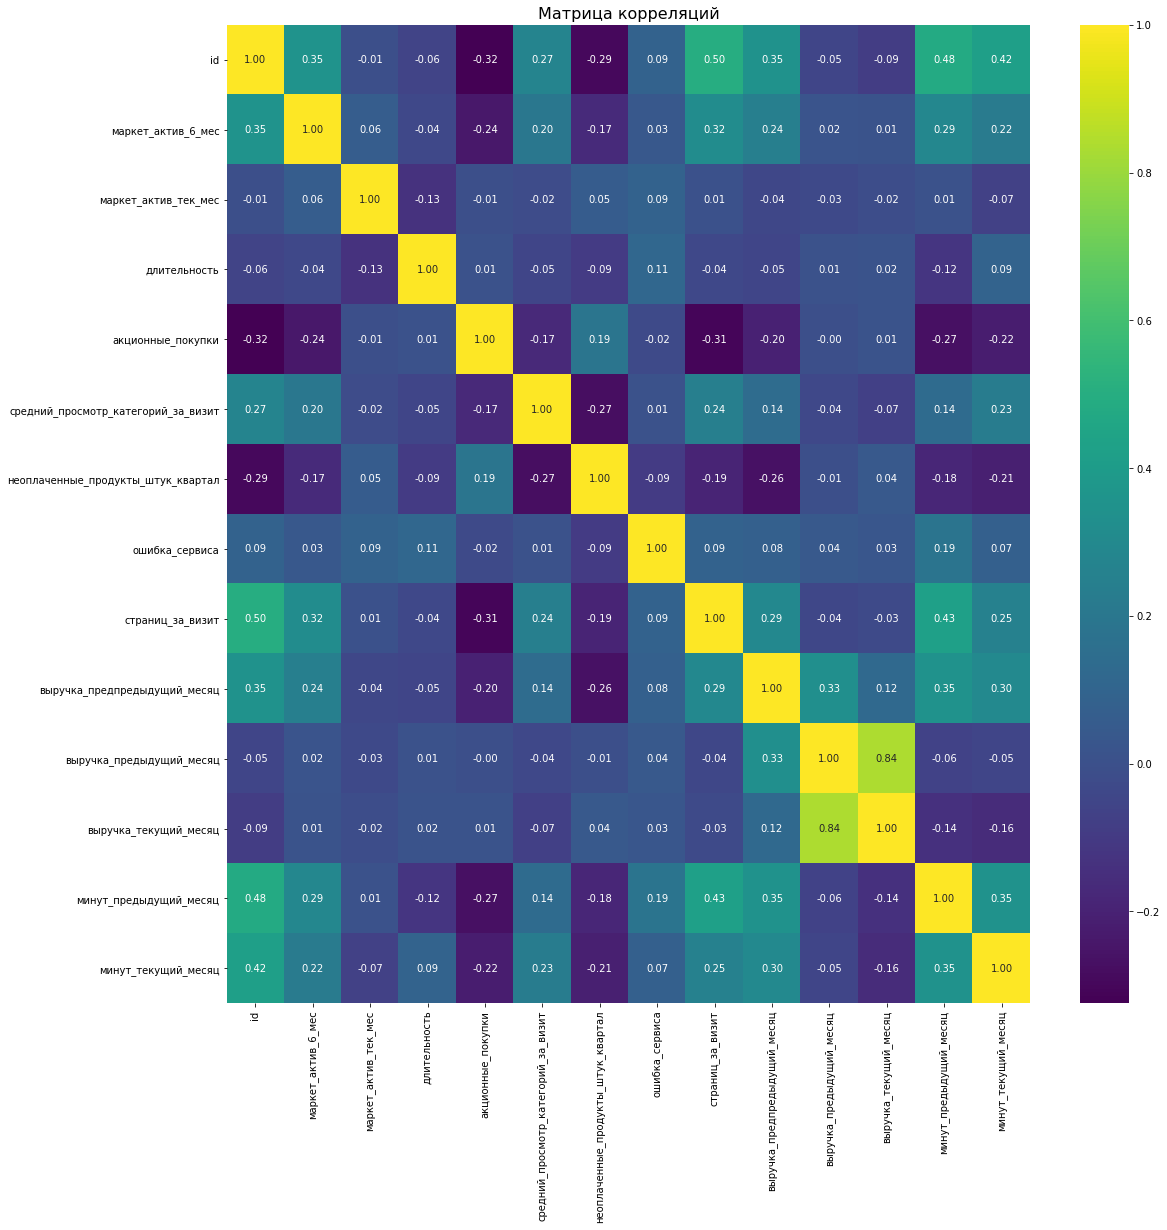

In [39]:
plt.figure(figsize=(18, 18))
sns.heatmap(merged_df.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title("Матрица корреляций", fontsize=16)
plt.show;

> **Выводы по пятому шагу:**
>
> В пятом шаге были проделаны следующие действия: 
>  - построена матрица корреляций для **merged_df**
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. В данном проекте мы выявили, что наибольшая взаимосвязь может наблюдаться между показателями выручки за разные месяцы. Важно отметить, что мы установили порог корреляции в 0.9, и данное значение не превышено. При этом наша основная цель — учесть динамику продаж по месяцам. Исходя из этого, мы принимаем решение оставить все признаки в анализе, считая, что мультиколлинеарности в данных отсутствует. 
>
> - Корреляция между "выручка_предыдущий_месяц" и "выручка_текущий_месяц" составляет 0.803038;
> - Корреляция между "страниц_за_визит" и "выручка_предпредыдущий_месяц" равна 0.268851;
> - Корреляция между "страниц_за_визит" и "выручка_текущий_месяц" составляет 0.255391;
> - Корреляция между "выручка_предпредыдущий_месяц" и "минут_предыдущий_месяц" равна 0.290693;
> - Корреляция между "выручка_текущий_месяц" и "минут_текущий_месяц" составляет 0.349542.


## 6. Пайплайн

In [40]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X = merged_df.drop(columns=['покупательская_активность']).set_index('id')  
y = merged_df['покупательская_активность']

# делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y)

ohe_columns = [
    'разрешить_сообщать', 'популярная_категория'
]

ord_columns = [
    'тип_сервиса'
]

num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
               'длительность', 'акционные_покупки', 
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса', 'страниц_за_визит',
               'выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц', 
               'выручка_текущий_месяц','минут_предыдущий_месяц', 
               'минут_текущий_месяц' 
               ] 

ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
) 

ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ordinal_encoder', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)
pipe_final.fit(X_train, y_train)

print ('Лучшая модель и её параметры:\n', randomized_search.best_estimator_)
print ('Значение ROC AUC лучшей модели на тренировочной выборке:', randomized_search.best_score_)


Лучшая модель и её параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ordinal_encoder',
                      

> **Выводы по шестому шагу:**
>
> В шестом шаге были проделаны следующие действия: 
>  - построен полный пайплайн.
>
> **После проведённых действий можно сделать следующие выводы:**
>
> лучше всего справилась модель LogisticRegression() с гиперпараметрами (C=1, penalty='l1', random_state=42, solver='liblinear'), её метрика составила 0.8982698756607848. Выбор пал на метрику ROC-AUC, потому что ROC AUC обычно применяется в задачах бинарной классификации, у нас как раз целевой признак делится на значения "снизилась" или "прежний уровень".

## 7. Анализ важности признаков

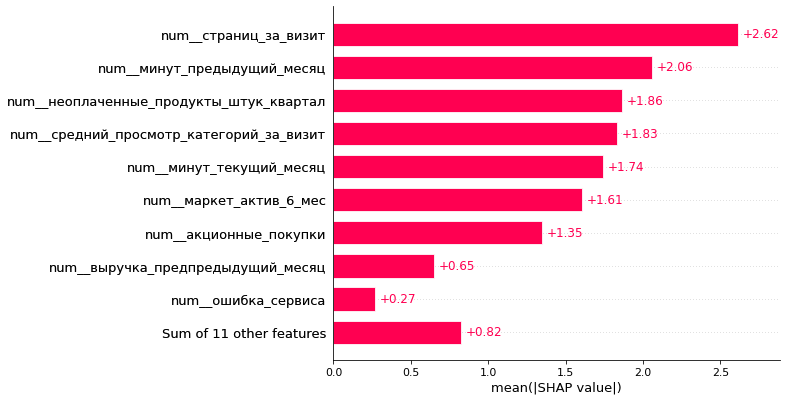

In [41]:
X_train_processed = pipe_final.named_steps['preprocessor'].fit_transform(X_train) 
X_test_processed = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

explainer = shap.LinearExplainer(randomized_search.best_estimator_['models'], X_train_processed)
explainer.feature_names = feature_names
shap_values = explainer(X_test_processed)

shap.plots.bar(shap_values)

> **Выводы по седьмому шагу:**
>
> В седьмом шаге были проделаны следующие действия: 
>  - построена столбчатая диаграмма **shap.plots.bar**, которая отражает общий вклад признаков в прогнозы модели.
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. Самый большой вес у признака "num__страниц_за_визит"(+2.62), он сильнее всего влияет на прогнозы модели, на втором месте признак "num__неоплаченные_продукты_штук_квартал"(+2.06), на третьем месте признак "num__минут_предыдущий_месяц"(+1.86)
> 2. Мало значимы для модели следующие признаки: "num__длительность"(+0.65), "num__выручка_предпредыдущий_месяц"(+0.27) и "сумма_11_других_признаков"(+0.82)
> 3. При принятии бизнес-решений можно проделать:
> - Оптимизация стратегии взаимодействия:
>
> Учитывая, что "num__страниц_за_визит" оказывает наибольшее влияние, можно оптимизировать стратегию взаимодействия с пользователями в зависимости от их активности на страницах. Например, персонализировать предложения или рекламу для тех, кто часто просматривает страницы.
>
> - Управление продажами неоплаченных продуктов:
> 
> Поскольку "num__неоплаченные_продукты_штук_квартал" также значим, стратегия управления продажами неоплаченных продуктов. Это может включать в себя рассылку напоминаний или предложения о скидках для тех, у кого есть неоплаченные продукты.
>
> - Анализ и оптимизация времени проведения акций:
>
> Признак "num__минут_предыдущий_месяц" также важен. Можно проанализировать временные тренды и оптимизировать проведение маркетинговых акций в те периоды, когда активность минимальна.
Рационализация данных:
>
> Признаки "num__длительность", "num__выручка_предпредыдущий_месяц" и "сумма_11_других_признаков" имеют небольшое влияние, можно рассмотреть возможность рационализации процесса сбора данных или даже исключения этих признаков из модели с целью снижения издержек.

## 8. Сегментация покупателей

#### 8.1 Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

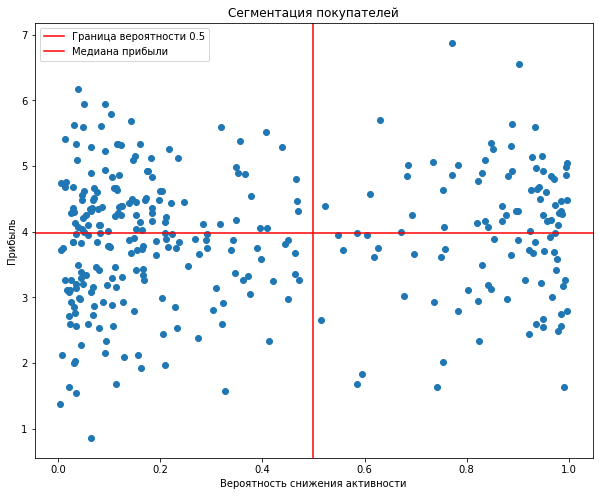

In [42]:
# Получение вероятностей
proba = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]
test_prob = pd.DataFrame(pd.concat([pd.Series(proba), pd.Series(X_test.index)], axis=1))
test_prob.columns = ['вероятность_снижения', 'id']

# Объединение вероятностей с данными о прибыли
test_prob_money = money_df.merge(test_prob, on='id')
    
# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(test_prob_money['вероятность_снижения'], test_prob_money['прибыль'])
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Сегментация покупателей')
# Добавление линий разделения на 4 квадранта графика
plt.axvline(x=0.5, color='red', linestyle='-', label='Граница вероятности 0.5')
plt.axhline(y=test_prob_money['прибыль'].median(), color='red', linestyle='-', label='Медиана прибыли')
plt.legend()
plt.show()

In [43]:
# Отбор точек, попавших в верхний правый квадрат
upper_right_quadrant_df = test_prob_money[(test_prob_money['вероятность_снижения'] > 0.5) & (test_prob_money['прибыль'] > test_prob_money['прибыль'].median())]

# Вывод данных
upper_right_quadrant_df.head()

,id,прибыль,вероятность_снижения
0,215349,4.16,0.868418
1,215351,4.87,0.771228
5,215356,4.93,0.889175
11,215375,4.18,0.964516
12,215376,4.26,0.948647


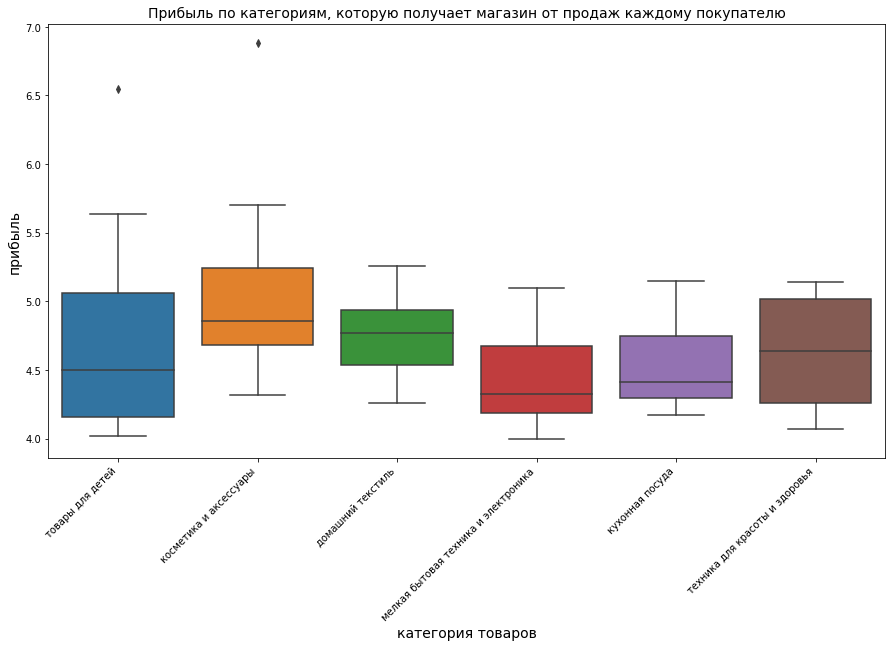

In [44]:
# Отфильтровать market_file_df для покупателей из верхнего правого квадрата
selected_market_data = merged_df[merged_df['id'].isin(upper_right_quadrant_df['id'])]
# Добавим столбец прибыли из upper_right_quadrant_df в selected_market_data
selected_market_data = selected_market_data.merge(upper_right_quadrant_df[['id', 'прибыль']], on='id')

# Построить boxplot для категорий
plt.figure(figsize=(15, 8))
sns.boxplot(x='популярная_категория', y='прибыль', data=selected_market_data)
plt.xlabel('категория товаров', fontsize=14)
plt.ylabel('прибыль', fontsize=14)
plt.title('Прибыль по категориям, которую получает магазин от продаж каждому покупателю', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
average_profit_by_category = selected_market_data.groupby('популярная_категория')['прибыль'].sum().sort_values(ascending=False)
average_profit_by_category

популярная_категория
товары для детей                        80.95
домашний текстиль                       56.81
косметика и аксессуары                  50.80
кухонная посуда                         31.82
мелкая бытовая техника и электроника    26.69
техника для красоты и здоровья          23.13
Name: прибыль, dtype: float64

> **Выводы по восьмому шагу:**
>
> В восьмом шаге были проделаны следующие действия: 
>  - Отобрана группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью;
>  - Построен график **scatterplot** по отобранному сегменту;
>  - Отбор точек, попавших в верхний правый квадрат;
>  - Построен график **boxplot** по приыли и по популярной категории.
>
> **После проведённых действий можно сделать следующие предложения по работе с сегментом для увеличения покупательской активности:**
> 1. Выбор этого сегмента важен для того, чтобы фокусировать усилия бизнеса на клиентах, способных приносить наибольшую прибыль, и в то же время предотвращать возможный отток.
> 2. Отобраны клиенты попавшие в верхний правый квадрат так как нас интересуют покупатели с большой прибылью и большой вероятностью снижения покупательской активности, границы были выбраны исходя из следующих соображений:
> > **Граница вероятности 0.5:**
Разделение на две группы. В данном случае, точки слева от этой границы будут отражать ситуации с низкой вероятностью снижения активности, а справа - с высокой вероятностью.
Граница 0.5 является логичным выбором для бинарной классификации, так как она делит вероятности поровну.
> >
> >**Горизонтальная линия на уровне медианы прибыли:**
Медиана прибыли выбрана в качестве меры центральной тенденции, которая делит прибыль на две равные части.
Горизонтальная линия позволяет визуально выделить области с прибылью выше и ниже медианы.
> >
> > Выбор этих границ обусловлен тем, что мы хотим визуально выделить четыре квадранта на графике в зависимости от вероятности снижения активности и прибыльности. Границы помогают идентифицировать группы покупателей, которые необходимы для дальнейшего анализа.
> 3. После построения **boxplot** по прибыли и популярным категориям было обнаружено, что наименее прибыльная категория это **техника для красоты и здоровья**(23.13)
> 4. Предложения бизнесу:
> > **Акции на Технику для красоты и здоровья:**
Учитывая, что в данной категории прибыль относительно невелика, акции могут стать стимулом для покупателей.
Можно предложить скидки, бонусы или бандлы с продуктами этой категории.
> >
> > **Фокус на другие категории:**
Возможно, акции необходимо сосредоточить на более популярных категориях, таких как "Товары для детей" или "Домашний текстиль", где прибыль выше.
Это может привести к увеличению общей покупательской активности.

## 9. Общие выводы

В ходе исследования были проведены различные этапы анализа данных для определения оптимального стратегического подхода к персонализации предложений для клиентов интернет-магазина "В один клик".

На этапе загрузки данных были изучены основные характеристики и структура данных. Предобработка данных включала в себя переименование столбцов, изменение типов данных, поиск и удаление дубликатов, приведение значений к одному регистру, а также обработку аномальных значений.
Исследовательский анализ данных помог выделить основные статистические показатели и визуализировать распределение данных. Объединение таблиц позволило учесть различные аспекты в данных, что необходимо для дальнейшей работы.

Корреляционный анализ позволил оценить взаимосвязи между различными признаками. Пайплайн машинного обучения был построен для определения лучшей модели и её гиперпараметров, которой является LogisticRegression() с гиперпараметрами (C=1, penalty='l1', random_state=42, solver='liblinear'), её метрика составила 0.8982698756607848. Анализ важности признаков с использованием shap позволил выявить ключевые факторы, влияющие на покупательскую активность.

Сегментация покупателей позволила выделить группу клиентов, с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью, и выявить те категорию товаров на которые клиенты тратьят больше либо меньше, из-за чего были предложены бизнес-решения.

Обобщая результаты исследования, можно сделать вывод о том, что персонализация предложений для постоянных клиентов имеет потенциал для увеличения их покупательской активности. С использованием машинного обучения и анализа данных можно разработать эффективные стратегии персонализации, учитывая индивидуальные предпочтения клиентов.

### Чек-лист готовности проекта

- [x]  импортированы все необходимые библиотеки.

**Шаг 1. Загрузка данных**
- [x]  загружены данные;
- [x]  изучена общая информация;
- [x]  написан вывод.

**Шаг 2. Предобработка данных**
- [x]  переименованы столбцы;
- [x]  найдены и устранены явные и неявные дубликаты;
- [x]  все значения приведены к одному регистру;
- [x]  найдены аномальные значения и удалены, где это необходимо;
- [x]  написан вывод.

**Шаг 3. Исследовательский анализ данных**
- [x]  созданы функции для построения графиков;
- [x]  построены графики по всем признакам;
- [x]  отобраны клиенты с покупательской активностью не менее трёх месяцев;
- [x]  построен график по отобранным клиентам;
- [x]  написан вывод.

**Шаг 4. Объединение таблиц**
- [x]  3 датафрейма объединены в один;
- [x]  проверены пропущенные значения;
- [x]  написан вывод.

**Шаг 5. Корреляционный анализ**
- [x]  построена матрица корреляций;
- [x]  написан вывод.

**Шаг 6. Пайплайн**
- [x]  построены пайплайн;
- [x]  найдена лучшая модель и её гиперпараметры;
- [x]  написан вывод.

**Шаг 7. Анализ важности признаков**
- [x]  построена столбчатая диаграмма **shap.plots.bar**;
- [x]  написан вывод.

**Шаг 8. Сегментация покупателей**
- [x]  отобрана группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью;
- [x]  построены график по отобранным клиентам;
- [x]  написан вывод.

**Общий вывод**
- [x]  написан общий вывод;